In [16]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from spatialmath import SE3
import roboticstoolbox as rtb

In [2]:
H1 = 10
W1 = 10
L1 = 40
W2 = 5
H2 = 5
L2 = 40

In [3]:
link1 = rtb.RevoluteDH(d=H1, a=0, alpha=0)
link2 = rtb.RevoluteDH(d=0, a=0, alpha=np.pi/2)
link3 = rtb.RevoluteDH(d=W1, a=L1, alpha=np.pi)
link4 = rtb.RevoluteDH(d=W2, a=L2, alpha=np.pi/2)
link5 = rtb.RevoluteDH(d=W2, a=0, alpha=-np.pi/2)
link6 = rtb.RevoluteDH(d=H2, a=0, alpha=-np.pi/2)

In [4]:
robot = rtb.DHRobot([link1, link2, link3, link4, link5, link6], name='robot')
robot

DHRobot: robot, 6 joints (RRRRRR), dynamics, standard DH parameters
┌─────┬────┬────┬────────┐
│ θⱼ  │ dⱼ │ aⱼ │   ⍺ⱼ   │
├─────┼────┼────┼────────┤
│  q1 │ 10 │  0 │   0.0° │
│  q2 │  0 │  0 │  90.0° │
│  q3 │ 10 │ 40 │ 180.0° │
│  q4 │  5 │ 40 │  90.0° │
│  q5 │  5 │  0 │ -90.0° │
│  q6 │  5 │  0 │ -90.0° │
└─────┴────┴────┴────────┘

┌──┬──┐
└──┴──┘

In [25]:
q = np.deg2rad([0, 90, 0, 0, 0, 0])

In [26]:
Ts_rbt = robot.fkine(q)
print(Ts_rbt)


   0         1         0         0         
   1         0         0         80        
   0         0        -1         15        
   0         0         0         1         



In [23]:
# Cinemática directa paso a paso
def fk_chain(robot, q):
    Ts = []
    T = SE3() # Matriz identidad 4x4 (posición inicial del mundo)
    Ts.append(T)
    for i, link in enumerate(robot.links):
        A_i = link.A(q[i])
        T = T * A_i
        Ts.append(T)
    return Ts

# Graficar los ejes de las transformaciones
def plot_chain(Ts, title="Configuración del robot", label_axes=True):
    pts = np.array([T.t for T in Ts])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # ajuste para los límites de graficación
    if len(pts) >= 2:
        diag = np.linalg.norm(pts[-1] - pts[0])
    else:
        diag = 1.0
    L = 0.1 * (diag if diag > 1e-6 else 1.0)

    for i, T in enumerate(Ts):
        o = T.t
        R = T.R
        ex = R @ np.array([1,0,0]) * L
        ey = R @ np.array([0,1,0]) * L
        ez = R @ np.array([0,0,1]) * L

        #gráfica de los ejes
        ax.quiver(o[0], o[1], o[2], ex[0], ex[1], ex[2], color='r')
        ax.quiver(o[0], o[1], o[2], ey[0], ey[1], ey[2], color='g')
        ax.quiver(o[0], o[1], o[2], ez[0], ez[1], ez[2], color='b')

        # etiqueta de los ejes
        if label_axes:
            off = 1.05
            ax.text(*(o + ex * off), f"x_{i}", fontsize=9)
            ax.text(*(o + ey * off), f"y_{i}", fontsize=9)
            ax.text(*(o + ez * off), f"z_{i}", fontsize=9)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.set_box_aspect([1,1,1])
    plt.show

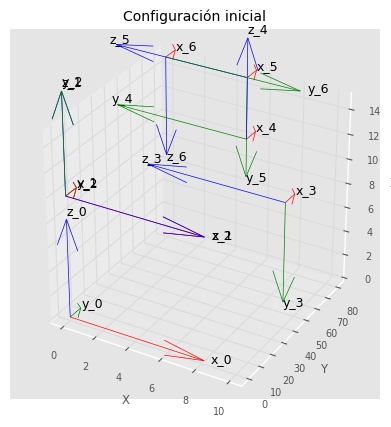

In [27]:
Ts0 = fk_chain(robot, q)
plot_chain(Ts0, title="Configuración inicial")

In [40]:
link1_1 = rtb.RevoluteDH(d=0, a=0, alpha=0)
link1_2 = rtb.PrismaticDH(theta=0, a=0, alpha=np.deg2rad(270))
link1_3 = rtb.PrismaticDH(theta=0, a=0, alpha=0)
link1_4 = rtb.RevoluteDH(d=0, a=0, alpha=0)

robot1 = rtb.DHRobot([link1_1, link1_2, link1_3, link1_4], name='RPPR')
robot1

DHRobot: RPPR, 4 joints (RPPR), dynamics, standard DH parameters
┌──────┬─────┬────┬────────┐
│  θⱼ  │ dⱼ  │ aⱼ │   ⍺ⱼ   │
├──────┼─────┼────┼────────┤
│  q1  │   0 │  0 │   0.0° │
│ 0.0° │  q2 │  0 │ 270.0° │
│ 0.0° │  q3 │  0 │   0.0° │
│  q4  │   0 │  0 │   0.0° │
└──────┴─────┴────┴────────┘

┌──┬──┐
└──┴──┘

In [41]:
q = [0,
     0,
     0,
     0]

Ts_rbt = robot1.fkine(q)
Ts_rbt

   1         0         0         0         
   0         0         1         0         
   0        -1         0         0         
   0         0         0         1         


[SE3(array([[1., 0., 0., 0.],
           [0., 1., 0., 0.],
           [0., 0., 1., 0.],
           [0., 0., 0., 1.]])), SE3(array([[1., 0., 0., 0.],
           [0., 1., 0., 0.],
           [0., 0., 1., 0.],
           [0., 0., 0., 1.]])), SE3(array([[ 1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.],
           [ 0., -1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.]])), SE3(array([[ 1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.],
           [ 0., -1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.]])), SE3(array([[ 1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.],
           [ 0., -1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.]]))]


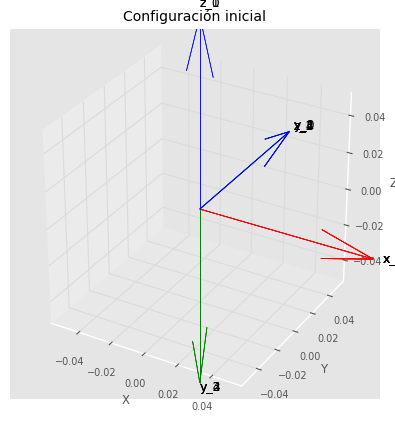

In [42]:
Ts1 = fk_chain(robot1, q)
print(Ts1)
plot_chain(Ts1, title="Configuración inicial")